In [1]:
import skewt as st
import skewt_moments as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [40]:
v = np.linspace(-100.,100.,100)
w_true = 10.
v_c_true = 2.5
alpha_true = -1.
nu_true = 10.

In [41]:
skewt_true = st.skewt(v, w_true, v_c_true, alpha_true, nu_true)

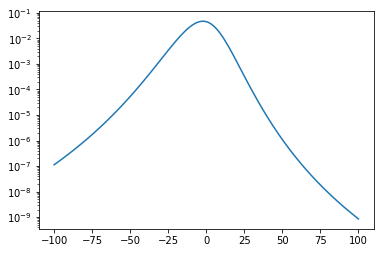

In [42]:
plt.semilogy(v, skewt_true)

In [43]:
Streaming# Measure its moments
true_mean = simps(skewt_true * v, v)
true_std = np.sqrt(simps(skewt_true * (v - true_mean)**2, v)) 
true_gamma1 = simps(skewt_true * (v - true_mean)**3, v)/true_std**3
true_gamma2 = simps(skewt_true * (v - true_mean)**4, v)/true_std**4 - 3.

In [44]:
v_c, w, alpha, nu = sm.moments2parameters(true_mean, true_std, true_gamma1, true_gamma2)

In [45]:
print(f'V_c estimated: {v_c}, true: {v_c_true}')
print(f'W estimated: {w}, true: {w_true}')
print(f'alpha estimated: {alpha}, true: {alpha_true}')
print(f'nu estimated: {nu}, true: {nu_true}')

V_c estimated: 2.5317398848531463, true: 2.5
W estimated: 10.031186911654427, true: 10.0
alpha estimated: -1.0063692289474448, true: -1.0
nu estimated: 10.13212713211739, true: 10.0


In [46]:
skewt_estimated = st.skewt(v, w, v_c, alpha, nu)

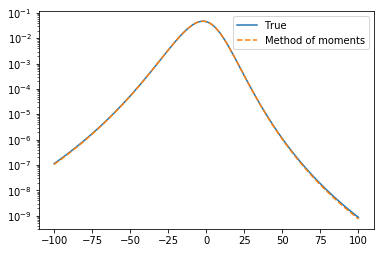

In [51]:
plt.semilogy(v, skewt_true, label = 'True')
plt.semilogy(v, skewt_estimated,
             label = 'Method of moments', linestyle='dashed')
plt.legend()

In [52]:
mean_from_parameters, std_from_parameters, gamma1_from_parameters, gamma2_from_parameters \
            = sm.parameters2moments(v_c_true, w_true, alpha_true, nu_true)

In [53]:
print(f'Mean estimated: {mean_from_parameters}, true: {true_mean}')
print(f'Std estimated: {std_from_parameters}, true: {true_std}')
print(f'Gamma1 estimated: {gamma1_from_parameters}, true: {true_gamma1}')
print(f'Gamma2 estimated: {gamma2_from_parameters}, true: {true_gamma2}')

Mean estimated: -3.614248375975988, true: -3.6141077274342788
Std estimated: 9.360340100491808, true: 9.359525600859815
Gamma1 estimated: -0.42429100418075755, true: -0.42238519178864414
Gamma2 estimated: 1.2909292058212891, true: 1.2665411933323067
